# Capstone Project

## -----------------------------------------------------------------------------

### Guidelines:
#### Using the dataset provided, create a binary classification. 

#### Perform the following:
##### 1. Perform an exploratory analysis (scaling, PCA, unbalanced)
##### 2. Split the data (train, validation, test)
##### 3. Perform 10-fold cross-validation and grid search (method of your choice)
##### 4. Compare the different classification medthods (Logistic Regressin, KNN, SVM, RF, XGBOOST)
##### 5. Show evaluation metrics (ROC-AUC, accuracy, f-1 score)
##### 6. Submit the jupyter notebook using the following format: Colaste_SP901Capstone.ipnyb
##### 

## -----------------------------------------------------------------------------

##

### -----------------------------------------------------------------------------

## 1. Perform Exploratory Analysis (Scaling, PCA, Unbalanced)

### -----------------------------------------------------------------------------

### *** Preprocessing - Data Exploration

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.max_columns = None

# Load the dataset
df_cs = pd.read_csv('SP901_CS_completedata.csv', delimiter = ';')
dv = "\n---------------------"


In [2]:
# Data Shape, to know the number of rows and columns.
print(dv)
print(df_cs.shape)


---------------------
(197, 430)


In [3]:
# View Data --- Head, to see the first few rows.
print(dv)
display(df_cs.head())


---------------------


,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,Entropy_hist.PET,AUC_hist.PET,H_suv.PET,Volume.PET,X3D_surface.PET,ratio_3ds_vol.PET,ratio_3ds_vol_norm.PET,irregularity.PET,tumor_length.PET,Compactness_v1.PET,Compactness_v2.PET,Spherical_disproportion.PET,Sphericity.PET,Asphericity.PET,Center_of_mass.PET,Max_3D_diam.PET,Major_axis_length.PET,Minor_axis_length.PET,Least_axis_length.PET,Elongation.PET,Flatness.PET,Max_cooc.L.PET,Average_cooc.L.PET,Variance_cooc.L.PET,Entropy_cooc.L.PET,DAVE_cooc.L.PET,DVAR_cooc.L.PET,DENT_cooc.L.PET,SAVE_cooc.L.PET,SVAR_cooc.L.PET,SENT_cooc.L.PET,ASM_cooc.L.PET,Contrast_cooc.L.PET,Dissimilarity_cooc.L.PET,Inv_diff_cooc.L.PET,Inv_diff_norm_cooc.L.PET,IDM_cooc.L.PET,IDM_norm_cooc.L.PET,Inv_var_cooc.L.PET,Correlation_cooc.L.PET,Autocorrelation_cooc.L.PET,Tendency_cooc.L.PET,Shade_cooc.L.PET,Prominence_cooc.L.PET,IC1_.L.PET,IC2_.L.PET,Coarseness_vdif_.L.PET,Contrast_vdif_.L.PET,Busyness_vdif_.L.PET,Complexity_vdif_.L.PET,Strength_vdif_.L.PET,SRE_align.L.PET,LRE_align.L.PET,GLNU_align.L.PET,RLNU_align.L.PET,RP_align.L.PET,LGRE_align.L.PET,HGRE_align.L.PET,LGSRE_align.L.PET,HGSRE_align.L.PET,LGHRE_align.L.PET,HGLRE_align.L.PET,GLNU_norm_align.L.PET,RLNU_norm_align.L.PET,GLVAR_align.L.PET,RLVAR_align.L.PET,Entropy_align.L.PET,SZSE.L.PET,LZSE.L.PET,LGLZE.L.PET,HGLZE.L.PET,SZLGE.L.PET,SZHGE.L.PET,LZLGE.L.PET,LZHGE.L.PET,GLNU_area.L.PET,ZSNU.L.PET,ZSP.L.PET,GLNU_norm.L.PET,ZSNU_norm.L.PET,GLVAR_area.L.PET,ZSVAR.L.PET,Entropy_area.L.PET,Max_cooc.H.PET,Average_cooc.H.PET,Variance_cooc.H.PET,Entropy_cooc.H.PET,DAVE_cooc.H.PET,DVAR_cooc.H.PET,DENT_cooc.H.PET,SAVE_cooc.H.PET,SVAR_cooc.H.PET,SENT_cooc.H.PET,ASM_cooc.H.PET,Contrast_cooc.H.PET,Dissimilarity_cooc.H.PET,Inv_diff_cooc.H.PET,Inv_diff_norm_cooc.H.PET,IDM_cooc.H.PET,IDM_norm_cooc.H.PET,Inv_var_cooc_.H.PET,Correlation_cooc.H.PET,Autocorrelation_cooc.H.PET,Tendency_cooc.H.PET,Shade_cooc.H.PET,Prominence_cooc.H.PET,IC1_d.H.PET,IC2_d.H.PET,Coarseness_vdif.H.PET,Contrast_vdif.H.PET,Busyness_vdif.H.PET,Complexity_vdif.H.PET,Strength_vdif.H.PET,SRE_align.H.PET,LRE_align.H.PET,RLNU_align.H.PET,RP_align.H.PET,LGRE_align.H.PET,HGRE_align.H.PET,LGSRE_align.H.PET,HGSRE_align.H.PET,LGHRE_align.H.PET,HGLRE_align.H.PET,GLNU_norm_align.H.PET,RLNU_norm_align.H.PET,GLVAR_align.H.PET,RLVAR_align.H.PET,Entropy_align.H.PET,SZSE.H.PET,LZSE.H.PET,LGLZE.H.PET,HGLZE.H.PET,SZLGE.H.PET,SZHGE.H.PET,LZLGE.H.PET,LZHGE.H.PET,GLNU_area.H.PET,ZSNU.H.PET,ZSP.H.PET,GLNU_norm.H.PET,ZSNU_norm.H.PET,GLVAR_area.H.PET,ZSVAR_H.PET,Entropy_area.H.PET,Max_cooc.W.PET,Average_cooc.W.PET,Variance_cooc.W.PET,Entropy_cooc.W.PET,DAVE_cooc.W.PET,DVAR_cooc.W.PET,DENT_cooc.W.PET,SAVE_cooc.W.PET,SVAR_cooc.W.PET,SENT_cooc.W.PET,ASM_cooc.W.PET,Contrast_cooc.W.PET,Dissimilarity_cooc.W.PET,Inv_diff_cooc.W.PET,Inv_diff_norm_cooc.W.PET,IDM_cooc.W.PET,IDM_norm_cooc.W.PET,Inv_var_cooc.W.PET,Correlation_cooc.W.PET,Autocorrelation_cooc.W.PET,Tendency_cooc.W.PET,Shade_cooc.W.PET,Prominence_cooc.W.PET,IC1_d.W.PET,IC2_d.W.PET,Coarseness_vdif.W.PET,Contrast_vdif.W.PET,Busyness_vdif.W.PET,Complexity_vdif.W.PET,Strength_vdif.W.PET,SRE_align.W.PET,LRE_align.W.PET,GLNU_align.W.PET,RLNU_align.W.PET,RP_align.W.PET,LGRE_align.W.PET,HGRE_align.W.PET,LGSRE_align.W.PET,HGSRE_align.W.PET,LGHRE_align.W.PET,HGLRE_align.W.PET,GLNU_norm_align.W.PET,RLNU_norm_align.W.PET,GLVAR_align.W.PET,RLVAR_align.W.PET,Entropy_align.W.PET,SZSE.W.PET,LZSE.W.PET,LGLZE.W.PET,HGLZE.W.PET,SZLGE.W.PET,SZHGE.W.PET,LZLGE.W.PET,LZHGE.W.PET,GLNU_area.W.PET,ZSNU.W.PET,ZSP.W.PET,GLNU_norm.W.PET,ZSNU_norm.W.PET,GLVAR_area.W.PET,ZSVAR.W.PET,Entropy_area.W.PET,Min_hist.ADC,Max_hist.ADC,Mean_hist.ADC,Variance_hist.ADC,Standard_Deviation_hist.ADC,Skewness_hist.ADC,Kurtosis_hist.ADC,Energy_hist.ADC,Entropy_hist.ADC,AUC_hist.ADC,Volume.ADC,X3D_surface.ADC,ratio_3ds_vol.ADC,ratio_3ds_vol_norm.ADC,irregularity.ADC,Com

In [4]:
# View Data --- Tail, to see the last few rows.
print(dv)
display(df_cs.tail())


---------------------


,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,Entropy_hist.PET,AUC_hist.PET,H_suv.PET,Volume.PET,X3D_surface.PET,ratio_3ds_vol.PET,ratio_3ds_vol_norm.PET,irregularity.PET,tumor_length.PET,Compactness_v1.PET,Compactness_v2.PET,Spherical_disproportion.PET,Sphericity.PET,Asphericity.PET,Center_of_mass.PET,Max_3D_diam.PET,Major_axis_length.PET,Minor_axis_length.PET,Least_axis_length.PET,Elongation.PET,Flatness.PET,Max_cooc.L.PET,Average_cooc.L.PET,Variance_cooc.L.PET,Entropy_cooc.L.PET,DAVE_cooc.L.PET,DVAR_cooc.L.PET,DENT_cooc.L.PET,SAVE_cooc.L.PET,SVAR_cooc.L.PET,SENT_cooc.L.PET,ASM_cooc.L.PET,Contrast_cooc.L.PET,Dissimilarity_cooc.L.PET,Inv_diff_cooc.L.PET,Inv_diff_norm_cooc.L.PET,IDM_cooc.L.PET,IDM_norm_cooc.L.PET,Inv_var_cooc.L.PET,Correlation_cooc.L.PET,Autocorrelation_cooc.L.PET,Tendency_cooc.L.PET,Shade_cooc.L.PET,Prominence_cooc.L.PET,IC1_.L.PET,IC2_.L.PET,Coarseness_vdif_.L.PET,Contrast_vdif_.L.PET,Busyness_vdif_.L.PET,Complexity_vdif_.L.PET,Strength_vdif_.L.PET,SRE_align.L.PET,LRE_align.L.PET,GLNU_align.L.PET,RLNU_align.L.PET,RP_align.L.PET,LGRE_align.L.PET,HGRE_align.L.PET,LGSRE_align.L.PET,HGSRE_align.L.PET,LGHRE_align.L.PET,HGLRE_align.L.PET,GLNU_norm_align.L.PET,RLNU_norm_align.L.PET,GLVAR_align.L.PET,RLVAR_align.L.PET,Entropy_align.L.PET,SZSE.L.PET,LZSE.L.PET,LGLZE.L.PET,HGLZE.L.PET,SZLGE.L.PET,SZHGE.L.PET,LZLGE.L.PET,LZHGE.L.PET,GLNU_area.L.PET,ZSNU.L.PET,ZSP.L.PET,GLNU_norm.L.PET,ZSNU_norm.L.PET,GLVAR_area.L.PET,ZSVAR.L.PET,Entropy_area.L.PET,Max_cooc.H.PET,Average_cooc.H.PET,Variance_cooc.H.PET,Entropy_cooc.H.PET,DAVE_cooc.H.PET,DVAR_cooc.H.PET,DENT_cooc.H.PET,SAVE_cooc.H.PET,SVAR_cooc.H.PET,SENT_cooc.H.PET,ASM_cooc.H.PET,Contrast_cooc.H.PET,Dissimilarity_cooc.H.PET,Inv_diff_cooc.H.PET,Inv_diff_norm_cooc.H.PET,IDM_cooc.H.PET,IDM_norm_cooc.H.PET,Inv_var_cooc_.H.PET,Correlation_cooc.H.PET,Autocorrelation_cooc.H.PET,Tendency_cooc.H.PET,Shade_cooc.H.PET,Prominence_cooc.H.PET,IC1_d.H.PET,IC2_d.H.PET,Coarseness_vdif.H.PET,Contrast_vdif.H.PET,Busyness_vdif.H.PET,Complexity_vdif.H.PET,Strength_vdif.H.PET,SRE_align.H.PET,LRE_align.H.PET,RLNU_align.H.PET,RP_align.H.PET,LGRE_align.H.PET,HGRE_align.H.PET,LGSRE_align.H.PET,HGSRE_align.H.PET,LGHRE_align.H.PET,HGLRE_align.H.PET,GLNU_norm_align.H.PET,RLNU_norm_align.H.PET,GLVAR_align.H.PET,RLVAR_align.H.PET,Entropy_align.H.PET,SZSE.H.PET,LZSE.H.PET,LGLZE.H.PET,HGLZE.H.PET,SZLGE.H.PET,SZHGE.H.PET,LZLGE.H.PET,LZHGE.H.PET,GLNU_area.H.PET,ZSNU.H.PET,ZSP.H.PET,GLNU_norm.H.PET,ZSNU_norm.H.PET,GLVAR_area.H.PET,ZSVAR_H.PET,Entropy_area.H.PET,Max_cooc.W.PET,Average_cooc.W.PET,Variance_cooc.W.PET,Entropy_cooc.W.PET,DAVE_cooc.W.PET,DVAR_cooc.W.PET,DENT_cooc.W.PET,SAVE_cooc.W.PET,SVAR_cooc.W.PET,SENT_cooc.W.PET,ASM_cooc.W.PET,Contrast_cooc.W.PET,Dissimilarity_cooc.W.PET,Inv_diff_cooc.W.PET,Inv_diff_norm_cooc.W.PET,IDM_cooc.W.PET,IDM_norm_cooc.W.PET,Inv_var_cooc.W.PET,Correlation_cooc.W.PET,Autocorrelation_cooc.W.PET,Tendency_cooc.W.PET,Shade_cooc.W.PET,Prominence_cooc.W.PET,IC1_d.W.PET,IC2_d.W.PET,Coarseness_vdif.W.PET,Contrast_vdif.W.PET,Busyness_vdif.W.PET,Complexity_vdif.W.PET,Strength_vdif.W.PET,SRE_align.W.PET,LRE_align.W.PET,GLNU_align.W.PET,RLNU_align.W.PET,RP_align.W.PET,LGRE_align.W.PET,HGRE_align.W.PET,LGSRE_align.W.PET,HGSRE_align.W.PET,LGHRE_align.W.PET,HGLRE_align.W.PET,GLNU_norm_align.W.PET,RLNU_norm_align.W.PET,GLVAR_align.W.PET,RLVAR_align.W.PET,Entropy_align.W.PET,SZSE.W.PET,LZSE.W.PET,LGLZE.W.PET,HGLZE.W.PET,SZLGE.W.PET,SZHGE.W.PET,LZLGE.W.PET,LZHGE.W.PET,GLNU_area.W.PET,ZSNU.W.PET,ZSP.W.PET,GLNU_norm.W.PET,ZSNU_norm.W.PET,GLVAR_area.W.PET,ZSVAR.W.PET,Entropy_area.W.PET,Min_hist.ADC,Max_hist.ADC,Mean_hist.ADC,Variance_hist.ADC,Standard_Deviation_hist.ADC,Skewness_hist.ADC,Kurtosis_hist.ADC,Energy_hist.ADC,Entropy_hist.ADC,AUC_hist.ADC,Volume.ADC,X3D_surface.ADC,ratio_3ds_vol.ADC,ratio_3ds_vol_norm.ADC,irregularity.ADC,Com

In [5]:
# Column Names,  to list the column names, which helps understand the features.
print(dv)
print(df_cs.columns)


---------------------
Index(['PatientID', 'Failure.binary', 'Entropy_cooc.W.ADC', 'GLNU_align.H.PET',
       'Min_hist.PET', 'Max_hist.PET', 'Mean_hist.PET', 'Variance_hist.PET',
       'Standard_Deviation_hist.PET', 'Skewness_hist.PET',
       ...
       'LZLGE.W.ADC', 'LZHGE.W.ADC', 'GLNU_area.W.ADC', 'ZSNU.W.ADC',
       'ZSP.W.ADC', 'GLNU_norm.W.ADC', 'ZSNU_norm.W.ADC', 'GLVAR_area.W.ADC',
       'ZSVAR.W.ADC', 'Entropy_area.W.ADC'],
      dtype='object', length=430)


In [6]:
print(dv)
print(df_cs.info())


---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 430 entries, PatientID to Entropy_area.W.ADC
dtypes: float64(428), int64(2)
memory usage: 661.9 KB
None


In [7]:
print(dv)
display(df_cs.describe())


---------------------


,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,Entropy_hist.PET,AUC_hist.PET,H_suv.PET,Volume.PET,X3D_surface.PET,ratio_3ds_vol.PET,ratio_3ds_vol_norm.PET,irregularity.PET,tumor_length.PET,Compactness_v1.PET,Compactness_v2.PET,Spherical_disproportion.PET,Sphericity.PET,Asphericity.PET,Center_of_mass.PET,Max_3D_diam.PET,Major_axis_length.PET,Minor_axis_length.PET,Least_axis_length.PET,Elongation.PET,Flatness.PET,Max_cooc.L.PET,Average_cooc.L.PET,Variance_cooc.L.PET,Entropy_cooc.L.PET,DAVE_cooc.L.PET,DVAR_cooc.L.PET,DENT_cooc.L.PET,SAVE_cooc.L.PET,SVAR_cooc.L.PET,SENT_cooc.L.PET,ASM_cooc.L.PET,Contrast_cooc.L.PET,Dissimilarity_cooc.L.PET,Inv_diff_cooc.L.PET,Inv_diff_norm_cooc.L.PET,IDM_cooc.L.PET,IDM_norm_cooc.L.PET,Inv_var_cooc.L.PET,Correlation_cooc.L.PET,Autocorrelation_cooc.L.PET,Tendency_cooc.L.PET,Shade_cooc.L.PET,Prominence_cooc.L.PET,IC1_.L.PET,IC2_.L.PET,Coarseness_vdif_.L.PET,Contrast_vdif_.L.PET,Busyness_vdif_.L.PET,Complexity_vdif_.L.PET,Strength_vdif_.L.PET,SRE_align.L.PET,LRE_align.L.PET,GLNU_align.L.PET,RLNU_align.L.PET,RP_align.L.PET,LGRE_align.L.PET,HGRE_align.L.PET,LGSRE_align.L.PET,HGSRE_align.L.PET,LGHRE_align.L.PET,HGLRE_align.L.PET,GLNU_norm_align.L.PET,RLNU_norm_align.L.PET,GLVAR_align.L.PET,RLVAR_align.L.PET,Entropy_align.L.PET,SZSE.L.PET,LZSE.L.PET,LGLZE.L.PET,HGLZE.L.PET,SZLGE.L.PET,SZHGE.L.PET,LZLGE.L.PET,LZHGE.L.PET,GLNU_area.L.PET,ZSNU.L.PET,ZSP.L.PET,GLNU_norm.L.PET,ZSNU_norm.L.PET,GLVAR_area.L.PET,ZSVAR.L.PET,Entropy_area.L.PET,Max_cooc.H.PET,Average_cooc.H.PET,Variance_cooc.H.PET,Entropy_cooc.H.PET,DAVE_cooc.H.PET,DVAR_cooc.H.PET,DENT_cooc.H.PET,SAVE_cooc.H.PET,SVAR_cooc.H.PET,SENT_cooc.H.PET,ASM_cooc.H.PET,Contrast_cooc.H.PET,Dissimilarity_cooc.H.PET,Inv_diff_cooc.H.PET,Inv_diff_norm_cooc.H.PET,IDM_cooc.H.PET,IDM_norm_cooc.H.PET,Inv_var_cooc_.H.PET,Correlation_cooc.H.PET,Autocorrelation_cooc.H.PET,Tendency_cooc.H.PET,Shade_cooc.H.PET,Prominence_cooc.H.PET,IC1_d.H.PET,IC2_d.H.PET,Coarseness_vdif.H.PET,Contrast_vdif.H.PET,Busyness_vdif.H.PET,Complexity_vdif.H.PET,Strength_vdif.H.PET,SRE_align.H.PET,LRE_align.H.PET,RLNU_align.H.PET,RP_align.H.PET,LGRE_align.H.PET,HGRE_align.H.PET,LGSRE_align.H.PET,HGSRE_align.H.PET,LGHRE_align.H.PET,HGLRE_align.H.PET,GLNU_norm_align.H.PET,RLNU_norm_align.H.PET,GLVAR_align.H.PET,RLVAR_align.H.PET,Entropy_align.H.PET,SZSE.H.PET,LZSE.H.PET,LGLZE.H.PET,HGLZE.H.PET,SZLGE.H.PET,SZHGE.H.PET,LZLGE.H.PET,LZHGE.H.PET,GLNU_area.H.PET,ZSNU.H.PET,ZSP.H.PET,GLNU_norm.H.PET,ZSNU_norm.H.PET,GLVAR_area.H.PET,ZSVAR_H.PET,Entropy_area.H.PET,Max_cooc.W.PET,Average_cooc.W.PET,Variance_cooc.W.PET,Entropy_cooc.W.PET,DAVE_cooc.W.PET,DVAR_cooc.W.PET,DENT_cooc.W.PET,SAVE_cooc.W.PET,SVAR_cooc.W.PET,SENT_cooc.W.PET,ASM_cooc.W.PET,Contrast_cooc.W.PET,Dissimilarity_cooc.W.PET,Inv_diff_cooc.W.PET,Inv_diff_norm_cooc.W.PET,IDM_cooc.W.PET,IDM_norm_cooc.W.PET,Inv_var_cooc.W.PET,Correlation_cooc.W.PET,Autocorrelation_cooc.W.PET,Tendency_cooc.W.PET,Shade_cooc.W.PET,Prominence_cooc.W.PET,IC1_d.W.PET,IC2_d.W.PET,Coarseness_vdif.W.PET,Contrast_vdif.W.PET,Busyness_vdif.W.PET,Complexity_vdif.W.PET,Strength_vdif.W.PET,SRE_align.W.PET,LRE_align.W.PET,GLNU_align.W.PET,RLNU_align.W.PET,RP_align.W.PET,LGRE_align.W.PET,HGRE_align.W.PET,LGSRE_align.W.PET,HGSRE_align.W.PET,LGHRE_align.W.PET,HGLRE_align.W.PET,GLNU_norm_align.W.PET,RLNU_norm_align.W.PET,GLVAR_align.W.PET,RLVAR_align.W.PET,Entropy_align.W.PET,SZSE.W.PET,LZSE.W.PET,LGLZE.W.PET,HGLZE.W.PET,SZLGE.W.PET,SZHGE.W.PET,LZLGE.W.PET,LZHGE.W.PET,GLNU_area.W.PET,ZSNU.W.PET,ZSP.W.PET,GLNU_norm.W.PET,ZSNU_norm.W.PET,GLVAR_area.W.PET,ZSVAR.W.PET,Entropy_area.W.PET,Min_hist.ADC,Max_hist.ADC,Mean_hist.ADC,Variance_hist.ADC,Standard_Deviation_hist.ADC,Skewness_hist.ADC,Kurtosis_hist.ADC,Energy_hist.ADC,Entropy_hist.ADC,AUC_hist.ADC,Volume.ADC,X3D_surface.ADC,ratio_3ds_vol.ADC,ratio_3ds_vol_norm.ADC,irregularity.ADC,Com

In [8]:
# Missing Values, to see if any data needs to be filled or cleaned.
print(dv)
print(df_cs.isnull().sum().sort_values(ascending=False))


---------------------
PatientID              0
SZLGE.L.ADC            0
LGLZE.L.ADC            0
LZSE.L.ADC             0
SZSE.L.ADC             0
                      ..
SZSE.H.PET             0
Entropy_align.H.PET    0
RLVAR_align.H.PET      0
GLVAR_align.H.PET      0
Entropy_area.W.ADC     0
Length: 430, dtype: int64



---------------------
Failure.binary
0    130
1     67
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6676\2809638628.py:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)


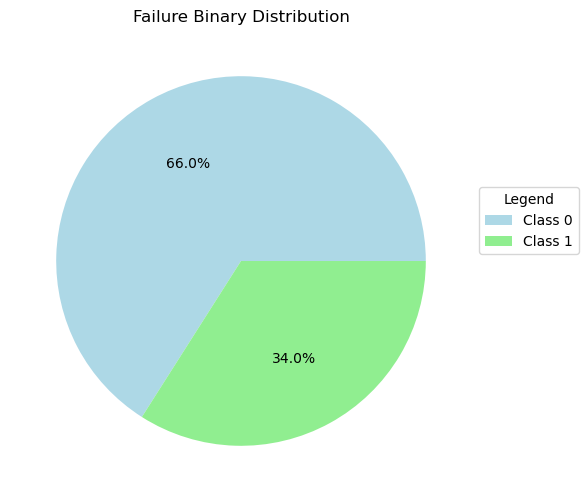

In [9]:
import matplotlib.pyplot as plt

# Class Distribution
print(dv)
print(df_cs['Failure.binary'].value_counts())

# Create a pie chart
plt.figure(figsize=(6, 6))
class_counts = df_cs['Failure.binary'].value_counts(normalize=True)
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Failure Binary Distribution')

# Create a custom legend
legend_labels = ['Class 0', 'Class 1']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()

In [10]:
# Correlation, to check how columns are related.
df_cs_corr = df_cs.corr()

# Find row and column names where the cell value is greater than 0.9 
# Excluding correlations where 'row' = 'column'
# Excluding repittion of row and column pairs
df_cs_corr_rows_column_names_p_nrows = 0  # Initialize a counter
df_cs_corr_rows_column_names_p = [
    (row, col) 
    for i, row in enumerate(df_cs_corr.index) 
    for j, col in enumerate(df_cs_corr.columns) 
    if df_cs_corr.loc[row, col] > 0.9 and i < j
]
df_cs_corr_rows_column_names_p_nrows = len(df_cs_corr_rows_column_names_p)

# Sort the list based on the correlation value in descending order
df_cs_corr_rows_column_names_p_sorted = sorted(
    df_cs_corr_rows_column_names_p, 
    key=lambda x: df_cs_corr.loc[x[0], x[1]], 
    reverse=True
)

# Print the df_cs_corr_rows_column_names_positive
print(dv)
print(f'No. of Correlation Pairs (>0.9): {df_cs_corr_rows_column_names_p_nrows}')
print(dv)

data = []
for row, col in df_cs_corr_rows_column_names_p_sorted:
    value = df_cs_corr.loc[row, col]
    data.append([row, col, value])

df_corr_info = pd.DataFrame(data, columns=['Column 1', 'Column 2', 'Correlation Value'])
display(df_corr_info.T)

# Orignially, I wanted to have the output in a heatmap, but it was messy and hard to interpret.


---------------------
No. of Correlation Pairs (>0.9): 6543

---------------------


0                         1     \
Column 1                ratio_3ds_vol_norm.PET           DAVE_cooc.L.PET   
Column 2           Spherical_disproportion.PET  Dissimilarity_cooc.L.PET   
Correlation Value                          1.0                       1.0   

                                  2                         3     \
Column 1               SVAR_cooc.L.PET           DAVE_cooc.H.PET   
Column 2           Tendency_cooc.L.PET  Dissimilarity_cooc.H.PET   
Correlation Value                  1.0                       1.0   

                                       4                    5     \
Column 1                    DAVE_cooc.W.PET      SVAR_cooc.W.PET   
Column 2           Dissimilarity_cooc.W.PET  Tendency_cooc.W.PET   
Correlation Value                       1.0                  1.0   

                                          6                         7     \
Column 1                ratio_3ds_vol_norm.ADC           DAVE_cooc.L.ADC   
Column 2           Spherical_disproportion.ADC  Dissimilarity_cooc.L.ADC   
Correlation Value                          1.0                       1.0   

                                  8                         9     \
Column 1               SVAR_cooc.L.ADC           DAVE_cooc.H.ADC   
Column 2           Tendency_cooc.L.ADC  Dissimilarity_cooc.H.ADC   
Correlation Value                  1.0                       1.0   

                                  10                        11    \
Column 1               SVAR_cooc.H.ADC           DAVE_cooc.W.ADC   
Column 2           Tendency_cooc.H.ADC  Dissimilarity_cooc.W.ADC   
Correlation Value                  1.0                       1.0   

                                  12                   13    \
Column 1               SVAR_cooc.W.ADC  IDM_norm_cooc.L.ADC   
Column 2           Tendency_cooc.W.ADC  IDM_norm_cooc.W.ADC   
Correlation Value                  1.0                  1.0   

                                       14                  15    \
Column 1           Inv_diff_norm_cooc.L.ADC  Average_cooc.L.ADC   
Column 2           Inv_diff_norm_cooc.W.ADC     SAVE_cooc.L.ADC   
Correlation Value                       1.0                 1.0   

                                 16                  17                  18    \
Column 1           Average_cooc.H.ADC  Average_cooc.L.PET  Average_cooc.W.PET   
Column 2              SAVE_cooc.H.ADC     SAVE_cooc.L.PET     SAVE_cooc.W.PET   
Correlation Value                 1.0            0.999999            0.999998   

                                    19               20    \
Column 1           GLNU_norm_align.H.ADC  SRE_align.W.ADC   
Column 2                 GLNU_norm.H.ADC   RP_align.W.ADC   
Correlation Value               0.999996         0.999992   

                                     21                 22    \
Column 1           Correlation_cooc.L.ADC   LGRE_align.H.PET   
Column 2           Correlation_cooc.W.ADC  LGSRE_align.H.PET   
Correlation Value                0.999991            0.99999   

                                  23                 24               25    \
Column 1           IDM_norm_cooc.L.PET   HGRE_align.W.ADC  SRE_align.H.ADC   
Column 2           IDM_norm_cooc.W.PET  HGSRE_align.W.ADC   RP_align.H.ADC   
Correlation Value              0.99998           0.999977         0.999977   

                               26                 27                 28    \
Column 1           HGRE_align.W.ADC  Variance_hist.ADC  HGSRE_align.W.ADC   
Column 2                HGLZE.W.ADC  GLVAR_align.W.ADC        HGLZE.W.ADC   
Correlation Value          0.999973            0.99997           0.999961   

                                29              30               31    \
Column 1           Variance_hist.PET  ASM_cooc.H.ADC  SRE_align.L.PET   
Column 2           GLVAR_align.W.PET  ASM_cooc.W.ADC   RP_align.L.PET   
Correlation Value           0.999953        0.999952         0.999948   

                               32                        33    \
Column 1   

In [11]:
# Find row and column names where the cell value is lesser than -0.9
df_cs_corr_rows_column_names_n_nrows = 0  # Initialize a counter
df_cs_corr_rows_column_names_n = [
    (row, col) 
    for i, row in enumerate(df_cs_corr.index) 
    for j, col in enumerate(df_cs_corr.columns) 
    if df_cs_corr.loc[row, col] < -0.9 and i < j
]

df_cs_corr_rows_column_names_n_nrows = len(df_cs_corr_rows_column_names_n)

# Sort the list based on the correlation value in descending order
df_cs_corr_rows_column_names_n_sorted = sorted(
    df_cs_corr_rows_column_names_n, 
    key=lambda x: df_cs_corr.loc[x[0], x[1]], 
    reverse=False
)

# Print the df_cs_corr_rows_column_names_negative
print(dv)
print(f'No. of Correlation Pairs (<0.9): {df_cs_corr_rows_column_names_n_nrows}')
print(dv)

data = []
for row, col in df_cs_corr_rows_column_names_n_sorted:
    value = df_cs_corr.loc[row, col]
    data.append([row, col, value])

df_corr_info = pd.DataFrame(data, columns=['Column 1', 'Column 2', 'Correlation Value'])
display(df_corr_info.T)

# Orignially, I wanted to have the output in a heatmap, but it was messy and hard to interpret.



---------------------
No. of Correlation Pairs (<0.9): 2

---------------------


,0,1
Column 1,IC1_d.W.ADC,IC1_d.H.ADC
Column 2,Strength_vdif.W.ADC,Strength_vdif.H.ADC
Correlation Value,-0.905982,-0.900776


### *** Preprocessing -  Scaling

###### Notes:
• We perform data splitting and early column dropping to enforce a clear separation between the training and testing datasets. 

• This prevents any inadvertent mixing of the two sets during subsequent preprocessing such as in unbalancing, we are going to use SMOTE to have a balanced training dataset.

In [12]:
from sklearn.model_selection import train_test_split

X = df_cs.drop(columns = ['PatientID','Failure.binary'])
y = df_cs['Failure.binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[0.5110986 , 0.01858926, 0.12779277, ..., 0.07706133, 0.30413454,
        0.11383879],
       [0.25409576, 0.05861964, 0.08524072, ..., 0.08014984, 0.11883779,
        0.01018082],
       [0.69027625, 0.3642467 , 0.19051957, ..., 0.06503193, 1.        ,
        0.73666372],
       ...,
       [0.59437007, 0.05906897, 0.07529484, ..., 0.17936684, 0.19414418,
        0.1413953 ],
       [0.4676702 , 0.05564722, 0.16324178, ..., 0.21911267, 0.12100948,
        0.15073638],
       [0.60521824, 0.01730174, 0.1620983 , ..., 0.5074518 , 0.21778321,
        0.17002778]])

In [15]:
X_test_scaled

array([[0.49814042, 0.25316123, 0.31353463, ..., 0.21587388, 0.30356077,
        0.15332686],
       [0.71481412, 0.16590426, 0.04034381, ..., 0.63834886, 0.17320183,
        0.20037628],
       [0.74634802, 0.34929967, 0.25045652, ..., 0.23891675, 0.2378936 ,
        0.16820558],
       ...,
       [0.49760975, 0.17974009, 0.39203375, ..., 0.50328194, 0.43261154,
        0.88143861],
       [0.67850839, 0.22770409, 0.14566099, ..., 0.20688953, 0.24971312,
        0.15802374],
       [0.68893497, 0.1975524 , 0.11973483, ..., 0.20271659, 0.21533898,
        0.14670968]])

### *** Preprocessing - Principal component analysis (PCA)

###### Notes:
We used 'n_components = 7' to retain a high percentage of the original dataset's variance as this retains a 91.41% of explained variance as shown in the below chart.

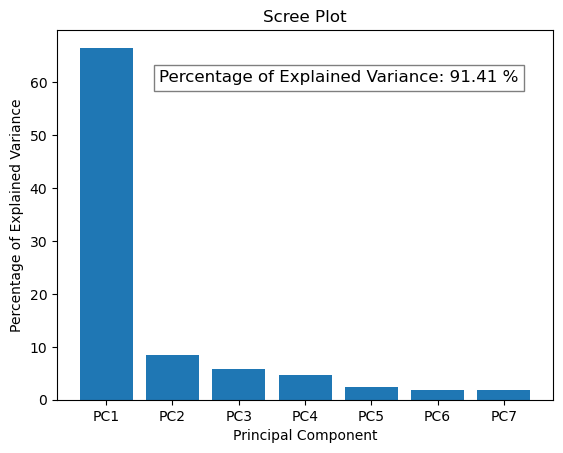

In [16]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
pca.fit(X_train_scaled)

a = pca.explained_variance_ratio_.sum()*100

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC'+ str(X_train_scaled) for X_train_scaled in range(1, len(per_var)+1)]

# Scree plot
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

# Textbox
textbox_x = 1.8
textbox_y = 60
textbox_text = f"Percentage of Explained Variance: {a:.2f} %"
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.text(textbox_x, textbox_y, textbox_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


### *** Preprocessing - Unbalanced


---------------------
Failure.binary
0    96
1    51
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6676\2437434084.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)


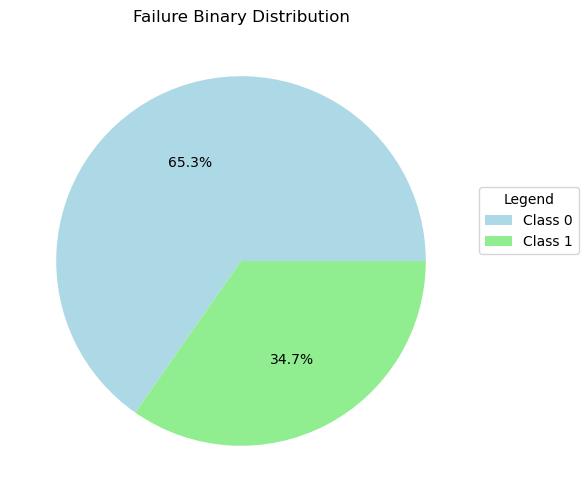

In [17]:
# Class Distribution
print(dv)
print(y_train.value_counts())

# Create a pie chart
plt.figure(figsize=(6, 6))
class_counts = y_train.value_counts(normalize=True)*100
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Failure Binary Distribution')

# Create a custom legend
legend_labels = ['Class 0', 'Class 1']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()

###### Notes:
Since the Failure Binary Distribution is unbalanced, we made use of SMOTE to have authentic samples added in the training dataset --- making it balanced.


---------------------
Failure.binary
1    96
0    96
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6676\2101566368.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)


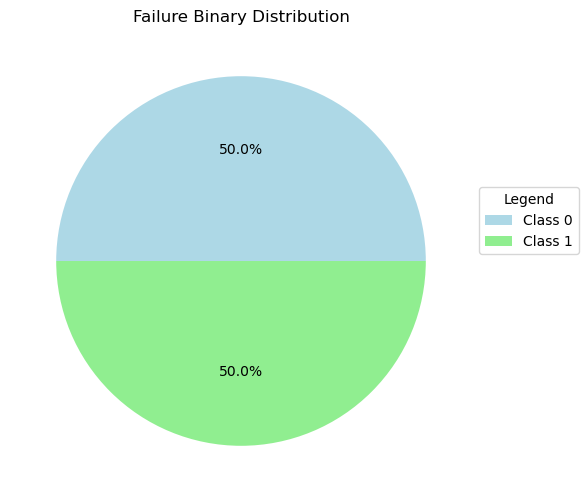

In [18]:
# Create an instance of SMOTE
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()

# Resample data
X_train_over_pca, y_train_over = oversampler.fit_resample(X_train_pca, y_train)

print(dv)
print(y_train_over.value_counts())

# Create a pie chart
plt.figure(figsize=(6, 6))
class_counts = y_train_over.value_counts(normalize=True)*100
colors = ['lightblue', 'lightgreen']

plt.pie(class_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Failure Binary Distribution')

# Create a custom legend
legend_labels = ['Class 0', 'Class 1']
legend_colors = colors
legend_texts = [f'{label}: {class_counts[i]:.1%}' for i, label in enumerate(legend_labels)]
plt.legend(legend_texts, title="Legend", loc="lower left", bbox_to_anchor=(1, 0.5), labels=legend_labels)

plt.show()

##

##

### -----------------------------------------------------------------------------

## 2. Split the Data (Train, Validation, Test)

### -----------------------------------------------------------------------------

###### Note: 
##### • The current training and test datasets are outputs from the preprocessing.
##### • Dataset Proportion from Original Dataset: Train Size = 0.75, Test Size = 0.25
#####
##### Current Training Datasets:          
##### X_train_over_pca
##### *** from X_train dataset that undergone scaling, PCA and unbalance SMOTE.
#####
##### y_train_over 
##### *** from y_train dataset that undergone unbalance SMOTE.
#####
#####
##### Current Test Dataset:                  
##### X_test_pca
##### *** from X_test dataset that undergone scaling and PCA.
#####
##### y_test
##### *** have not undergone any preprocessing

In [19]:
# Test Set with the size of 0.25 from the Original Dataset was already extracted before scaling.
# Lacking is validation dataset which will be extracted from "X_train_over_pca".
validation_size = 0.15

# Split the data into a training set and validation data set
X_train_temp, X_validation, y_train_temp, y_validation = train_test_split(X_train_over_pca, y_train_over, test_size=validation_size, random_state=10, stratify=y_train_over)


###### UPDATED:
#####
##### Updated Overall Training Datasets:          
##### • X_train_temp
##### • y_train_temp
#####
##### Updated Overall Validation Datasets:          
##### • X_validation
##### • y_validation
#####
##### Updated Overall Test Datasets:          
##### • X_test_pca
##### • y_test

##

##

### -----------------------------------------------------------------------------

## 3. Perform 10-Fold Cross-Validation and Grid Search

### -----------------------------------------------------------------------------

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### ***10-fold Cross-Validation (Method: Logistic Regression)

In [21]:
# Create a Logistic Regression model and fit it to the training data
logreg = LogisticRegression().fit(X_train_temp, y_train_temp)

# Perform 10-fold cross-validation and get the scores
scores = cross_val_score(logreg, X_train_temp, y_train_temp, cv=KFold(n_splits=10))

# Print the cross-validation scores
print(f'Cross-validation Scores: \n {scores}')


Cross-validation Scores: 
 [0.47058824 0.70588235 0.70588235 0.75       0.625      0.4375
 0.375      0.8125     0.5625     0.625     ]


### ***Grid Search (Method: Logistic Regression)

In [22]:
# Initialize variables to keep track of the best score and corresponding parameters
best_score = 0
best_parameters = None

# Define the hyperparameter values to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Iterate over each combination of hyperparameters
for C in param_grid['C']:
    for solver in param_grid['solver']:
        # Create a Logistic Regression model with the current hyperparameters
        clf = LogisticRegression(C=C, solver=solver, max_iter=1000)
        clf.fit(X_train_temp, y_train_temp)
        
        # Evaluate the model on the validation set
        score = clf.score(X_validation, y_validation)
        
        # If the current model's score is better than the previous best, update the best score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'Solver': solver}

# Print the best score and the corresponding best parameters
print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Best Score: 0.52
Best Parameters: {'C': 0.01, 'Solver': 'newton-cg'}


##

##

### -----------------------------------------------------------------------------

## 4. Compare the Different Classification Methods

### -----------------------------------------------------------------------------

##### Note:
I have a total of six (6) different classification models due to XGBOOST as I am not sure (from the instructions of the project capstone) if it was referring to the standard gradiant boosting or to the extreme gradiant boosting since based on the course ipnyb handouts, I have not found an example of extreme gradiant boosting --- only standard gradiant boosting.

### *** Logistic Regression

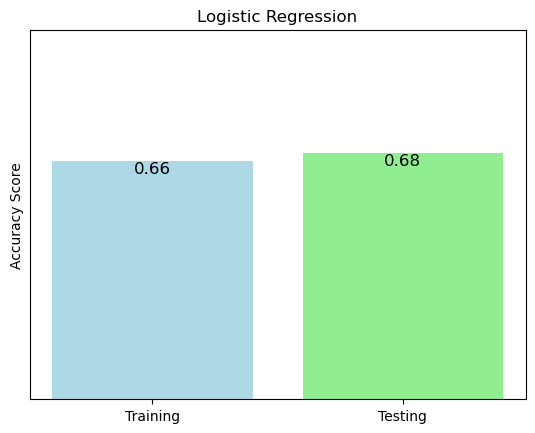

In [23]:
from sklearn.linear_model import LogisticRegression

# Create a classification model and fit it to the training data
lrc = LogisticRegression()
lrc.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
lrc_train_score = lrc.score(X_train_temp, y_train_temp)
lrc_test_score = lrc.score(X_test_pca, y_test)

# Model scores
scores = [lrc_train_score, lrc_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

### *** K-Nearest Neighbors (KNN)

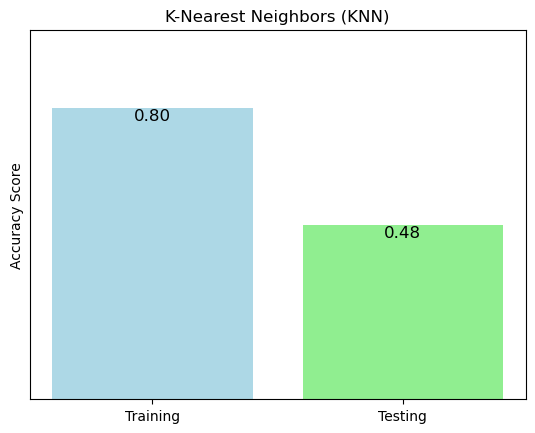

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create a classification model and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
knn_train_score = knn.score(X_train_temp, y_train_temp)
knn_test_score = knn.score(X_test_pca, y_test)

# Model scores
scores = [knn_train_score, knn_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('K-Nearest Neighbors (KNN)')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

### *** Support Vector Classifier (SVC)

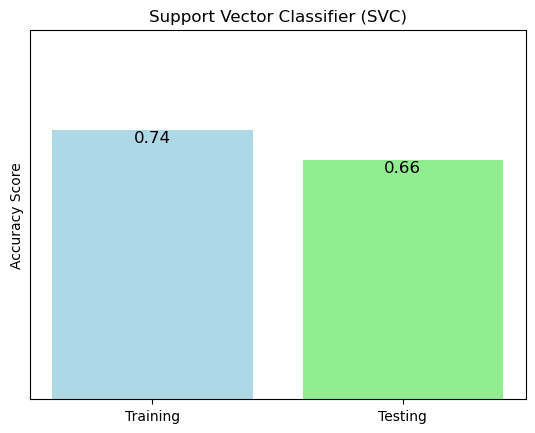

In [25]:
from sklearn.svm import SVC

# Create a classification model and fit it to the training data
svc = SVC()
svc.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
svc_train_score = svc.score(X_train_temp, y_train_temp)
svc_test_score = svc.score(X_test_pca, y_test)

# Model scores
scores = [svc_train_score, svc_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Support Vector Classifier (SVC)')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

### *** Random Forest Classifier (RF)

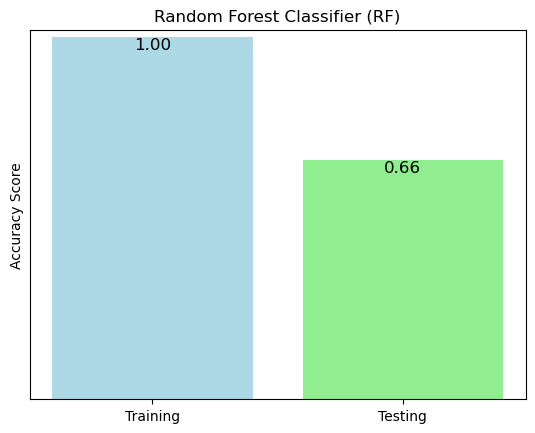

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a classification model and fit it to the training data
rfc = RandomForestClassifier()
rfc.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
rfc_train_score = rfc.score(X_train_temp, y_train_temp)
rfc_test_score = rfc.score(X_test_pca, y_test)

# Model scores
scores = [rfc_train_score, rfc_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier (RF)')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

### *** Gradient Boosting Classifier (Standard)

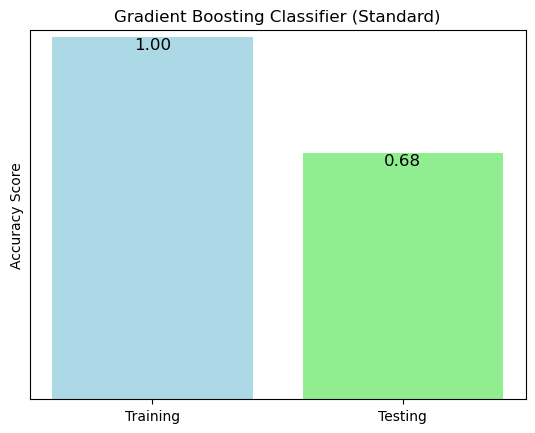

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classification model and fit it to the training data
grb = GradientBoostingClassifier()
grb.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
grb_train_score = grb.score(X_train_temp, y_train_temp)
grb_test_score = grb.score(X_test_pca, y_test)

# Model scores
scores = [grb_train_score, grb_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Gradient Boosting Classifier (Standard)')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

#### • Extreme Gradient Boosting Classifier (XGBOOST)

###### Note:
Extreme Gradient Boosting Classifier (XGBOOST) has a separate library from GradientBoostingClassifier. This means you need to install the below code to have this section of the notebook work.
##### pip install xgboost

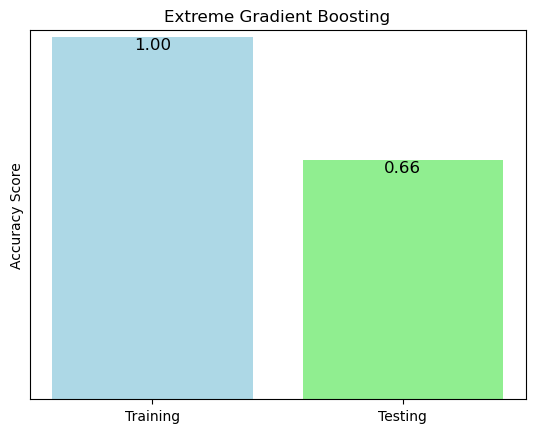

In [28]:
from xgboost import XGBClassifier

# Create a classification model and fit it to the training data
xgrb = XGBClassifier()
xgrb.fit(X_train_temp, y_train_temp)

# Calculate the accuracy scores for the training and test sets
xgrb_train_score = xgrb.score(X_train_temp, y_train_temp)
xgrb_test_score = xgrb.score(X_test_pca, y_test)

# Model scores
scores = [xgrb_train_score, xgrb_test_score]
labels = ['Training', 'Testing']

# Create the column chart
plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.title('Extreme Gradient Boosting')
plt.yticks([])
plt.ylim(0, 1.02)

# Display the scores on the columns
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.show()

##

##

### -----------------------------------------------------------------------------

## 4. Evaluation Metrics (ROC-AUC, Accuracy, F-1 Score)

### -----------------------------------------------------------------------------

### *** ROC-AUC

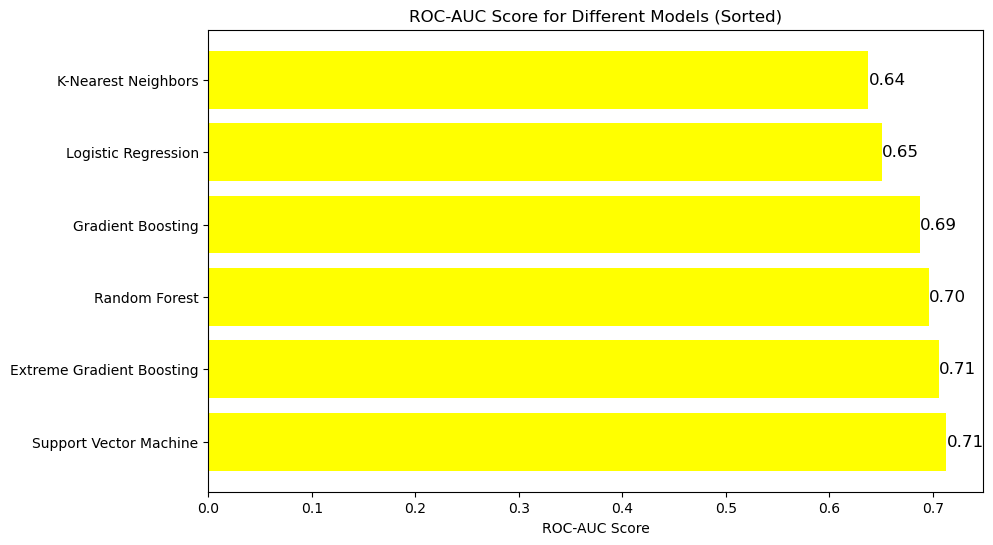

In [29]:
from sklearn.metrics import roc_auc_score

auc_lrc = roc_auc_score(y_test, lrc.decision_function(X_test_pca))
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_pca)[:, 1])
auc_svc = roc_auc_score(y_test, svc.decision_function(X_test_pca))
auc_rfc = roc_auc_score(y_test, rfc.predict_proba(X_test_pca)[:, 1])
auc_grb = roc_auc_score(y_test, grb.predict_proba(X_test_pca)[:, 1])
auc_xgrb = roc_auc_score(y_test, xgrb.predict_proba(X_test_pca)[:, 1])

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression', auc_lrc],
    ['K-Nearest Neighbors', auc_knn],
    ['Support Vector Machine', auc_svc],
    ['Random Forest', auc_rfc],
    ['Gradient Boosting', auc_grb],
    ['Extreme Gradient Boosting', auc_xgrb]
])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color= 'Yellow')
plt.xlabel('ROC-AUC Score')
plt.title('ROC-AUC Score for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()


### *** Accuracy

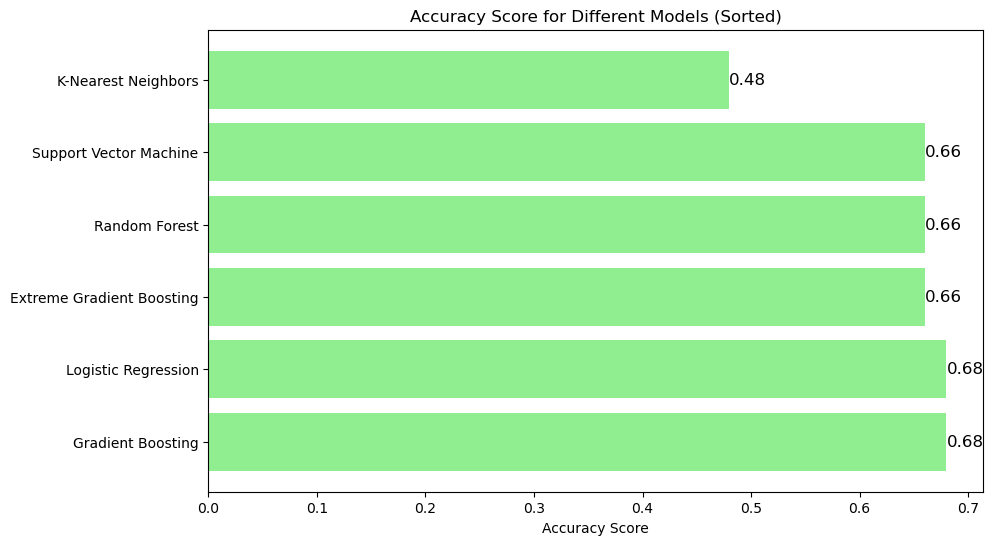

In [30]:
from sklearn.metrics import accuracy_score

ac_lrc = accuracy_score(y_test, lrc.predict(X_test_pca))
ac_knn = accuracy_score(y_test, knn.predict(X_test_pca))
ac_svc = accuracy_score(y_test, svc.predict(X_test_pca))
ac_rfc = accuracy_score(y_test, rfc.predict(X_test_pca))
ac_grb = accuracy_score(y_test, grb.predict(X_test_pca))
ac_xgrb = accuracy_score(y_test, xgrb.predict(X_test_pca))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression', ac_lrc],
    ['K-Nearest Neighbors', ac_knn],
    ['Support Vector Machine', ac_svc],
    ['Random Forest', ac_rfc],
    ['Gradient Boosting', ac_grb],
    ['Extreme Gradient Boosting', ac_xgrb]
])

# Extract model names and accuracy scores
model_names = model[:, 0]
accuracy_scores = model[:, 1].astype(float)

# Sort the data based on accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]
model_names = model_names[sorted_indices]
accuracy_scores = accuracy_scores[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='lightgreen')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score for Different Models (Sorted)')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the accuracy scores on the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center', fontsize=12, color='black')

plt.show()

### *** F-1 Score

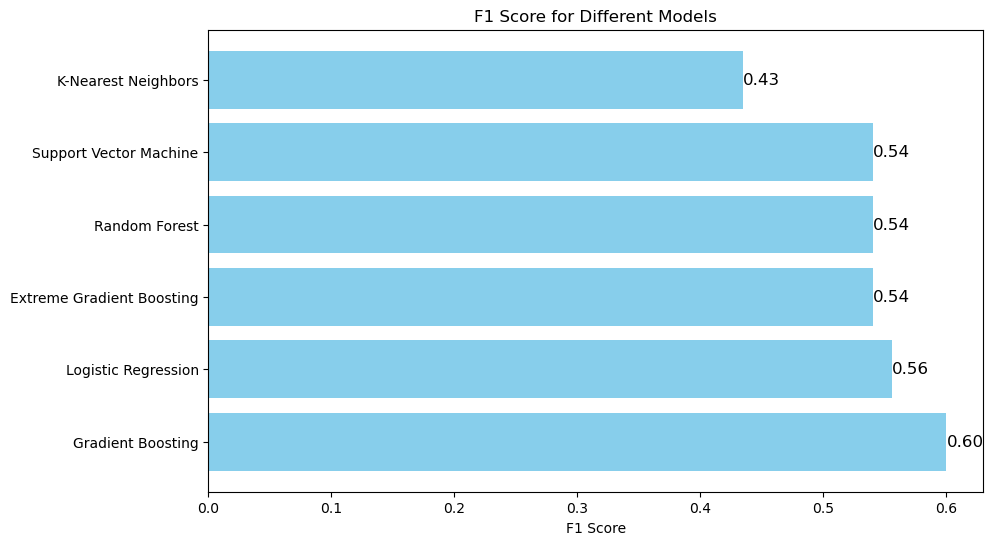

In [31]:
from sklearn.metrics import f1_score

fscore_lrc = f1_score(y_test, lrc.predict(X_test_pca))
fscore_knn = f1_score(y_test, knn.predict(X_test_pca))
fscore_svc = f1_score(y_test, svc.predict(X_test_pca))
fscore_rfc = f1_score(y_test, rfc.predict(X_test_pca))
fscore_grb = f1_score(y_test, grb.predict(X_test_pca))
fscore_xgrb = f1_score(y_test, xgrb.predict(X_test_pca))

# Find the model with the highest ROC-AUC score
model = np.array([
    ['Logistic Regression', fscore_lrc],
    ['K-Nearest Neighbors', fscore_knn],
    ['Support Vector Machine', fscore_svc],
    ['Random Forest', fscore_rfc],
    ['Gradient Boosting', fscore_grb],
    ['Extreme Gradient Boosting', fscore_xgrb]
])

# Extract model names and F1 scores
model_names = model[:, 0]
fscores = model[:, 1].astype(float)

# Sort the data based on F1 scores in descending order
sorted_indices = np.argsort(fscores)[::-1]
model_names = model_names[sorted_indices]
fscores = fscores[sorted_indices]

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, fscores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.grid(axis='x', linestyle=' ', alpha=0.6)

# Display the F1 scores on the bars
for i, fscore in enumerate(fscores):
    plt.text(fscore, i, f'{fscore:.2f}', va='center', fontsize=12, color='black')

plt.show()

# 

# 

# Evaluation Summary:
Of all the models or techniques, Gradient Boosting turned out to be the best in terms of three important things: (1) how well it correctly identified positive cases, (2) how well it separated different classes, and (3) how often it was right. 

This means that if we have a similar problem or dataset in the future, using Gradient Boosting is a smart choice because it's better at giving us accurate and reliable results among the models or techniques that we have contested.